# Acoustic Fire Extinguisher &mdash; Supervised Learning

## Project Specification

The work to develop is a classification problem related to acoustic fire extinguishers.

It will be supported by machine learning models in order to correctly classify the extinguishing status of fuel flames when subjected to an acoustic fire extinguishers’ sound waves.

Results are to be plotted for ease of visualization and comparison.

All the work developed in this project will be supported by Jupyter notebooks.

## Related work

The dataset for this problem can be found [here](https://www.kaggle.com/datasets/muratkokludataset/acoustic-extinguisher-fire-dataset)

This dataset’s data card includes several links related to existing work which aims to solve the same problem, some of which are:

- <https://www.sciencedirect.com/science/article/pii/S2214157X21007243> (Open Access)
- <https://www.sciencedirect.com/sdfe/reader/pii/S2214157X21007243/pdf>
- <https://ieeexplore.ieee.org/stamp/stamp.jsp?tp=&arnumber=9452168>

## Tools used

- **Pandas**: Tabular data manipulation
- **Scikit-learn/Tensorflow**: AI and machine learning models
- **Matplotlib/Seaborn**: Graphs and data visualization


In [12]:
import pandas as pd
import matplotlib as plt
import seaborn as sns
import tensorflow as tf

## Data analysis

First we load the dataset and check for missing values.


In [13]:
dataset = pd.read_excel("input/Acoustic_Extinguisher_Fire_Dataset.xlsx")

dataset.describe()

,SIZE,DISTANCE,DESIBEL,AIRFLOW,FREQUENCY,STATUS
count,17442.000000,17442.000000,17442.000000,17442.000000,17442.000000,17442.000000
mean,3.411765,100.000000,96.379142,6.975634,31.611111,0.497821
std,1.750977,54.773826,8.164096,4.736169,20.939149,0.500010
min,1.000000,10.000000,72.000000,0.000000,1.000000,0.000000
25%,2.000000,50.000000,90.000000,3.200000,14.000000,0.000000
50%,3.000000,100.000000,95.000000,5.800000,27.500000,0.000000
75%,5.000000,150.000000,104.000000,11.200000,47.000000,1.000000
max,7.000000,190.000000,113.000000,17.000000,75.000000,1.000000


No missing values were found.\
The dataset is also already balanced, with around 50% of the data being positive and 50% negative.

We then check the data types of each column.

In [14]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17442 entries, 0 to 17441
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   SIZE       17442 non-null  int64  
 1   FUEL       17442 non-null  object 
 2   DISTANCE   17442 non-null  int64  
 3   DESIBEL    17442 non-null  int64  
 4   AIRFLOW    17442 non-null  float64
 5   FREQUENCY  17442 non-null  int64  
 6   STATUS     17442 non-null  int64  
dtypes: float64(1), int64(5), object(1)
memory usage: 954.0+ KB


The fuel column is `object` when it should be `category`, the `size` column is `int64` when it should also be `category`, and the status column should be `bool`.
We will fix these errors and change all `int64` columns to `float64`.
We will also fix a typo in the column names.

In [15]:
dataset.rename(columns={"DESIBEL": "DECIBEL"}, inplace=True)

dataset["FUEL"] = dataset["FUEL"].map({
    "gasoline": 1,
    "kerosene": 2,
    "thinner": 3,
    "lpg": 4,
})

dataset = dataset.astype({
    "SIZE": "category",
    "FUEL": "category",
    "DISTANCE": "float64",
    "DECIBEL": "float64",
    "AIRFLOW": "float64",
    "FREQUENCY": "float64",
    "STATUS": "bool",
})

dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17442 entries, 0 to 17441
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype   
---  ------     --------------  -----   
 0   SIZE       17442 non-null  category
 1   FUEL       17442 non-null  category
 2   DISTANCE   17442 non-null  float64 
 3   DECIBEL    17442 non-null  float64 
 4   AIRFLOW    17442 non-null  float64 
 5   FREQUENCY  17442 non-null  float64 
 6   STATUS     17442 non-null  bool    
dtypes: bool(1), category(2), float64(4)
memory usage: 596.8 KB


KeyboardInterrupt: 

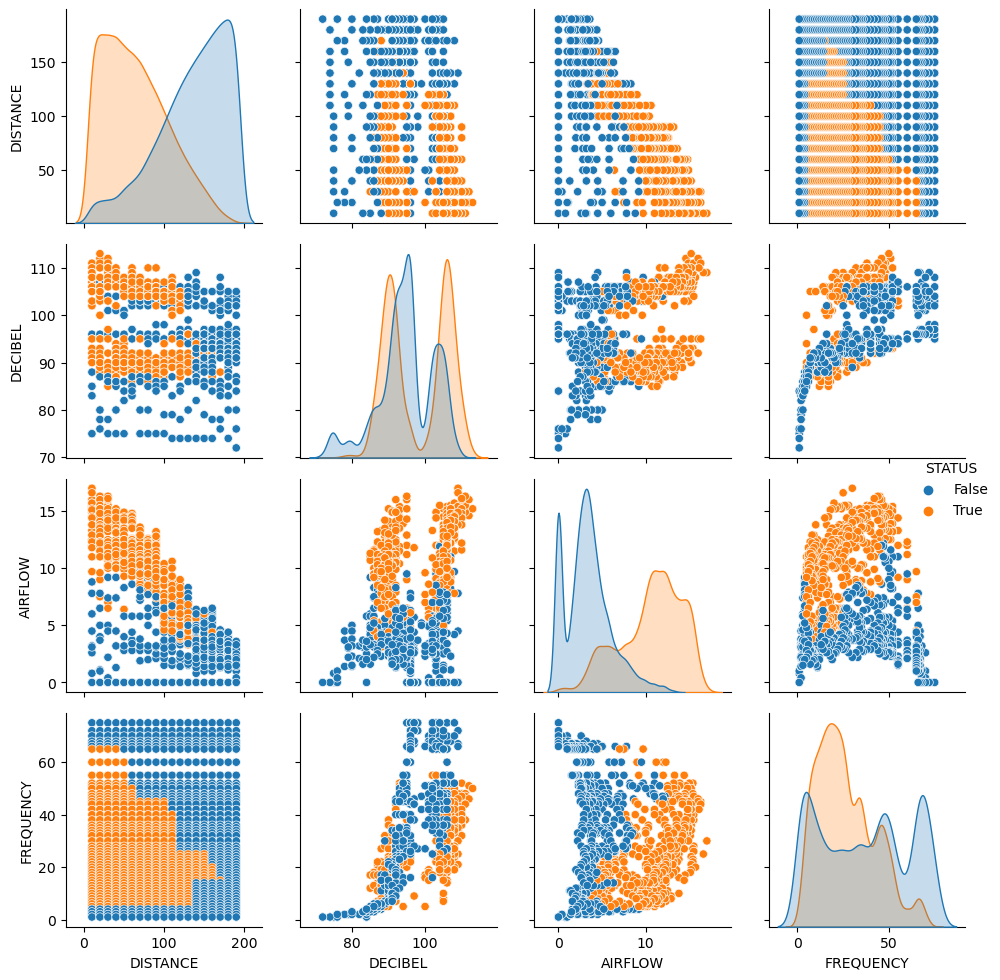

In [16]:
sns.pairplot(dataset, hue="STATUS")

The dataset looks ready to be used, and there aren't any outliers.


## Algorithms


We will use the following algorithms:

- **Decision Tree**
- **Random Forest**
- **K-Nearest Neighbors**
- **Support Vector Machine**
- **Neural Network**


In [33]:
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

inputs = dataset.drop(["STATUS"], axis=1).values
labels = dataset["STATUS"].values

models = {}

def run_model(name, model, parameters, scale=False):
    print(f"Running {name} model...")

    if scale:
        model = Pipeline([
            ("scaler", StandardScaler()),
            ("model", model),
        ])
        parameters = {
            f"model__{key}": value
            for key, value in parameters.items()
        }

    grid_search = GridSearchCV(model, parameters, cv=10, n_jobs=-1)
    grid_search.fit(inputs, labels)

    models[name] = grid_search
    print(f"Done running {name} model!")
    print(f"Best parameters: {grid_search.best_params_}")
    print(f"Accuracy: {grid_search.best_score_}")

inputs[:5]

array([[  1. ,   1. ,  10. ,  96. ,   0. ,  75. ],
       [  1. ,   1. ,  10. ,  96. ,   0. ,  72. ],
       [  1. ,   1. ,  10. ,  96. ,   2.6,  70. ],
       [  1. ,   1. ,  10. ,  96. ,   3.2,  68. ],
       [  1. ,   1. ,  10. , 109. ,   4.5,  67. ]])

### Decision Tree


In [39]:
from sklearn.tree import DecisionTreeClassifier

decision_tree = DecisionTreeClassifier(random_state=1)

parameters = {
    "max_depth": range(1, 15),
    "max_features": range(1, 7),
}

run_model("Decision Tree", decision_tree, parameters)


Running decision_tree model...
Done running decision_tree model!
Best parameters: {'max_depth': 7, 'max_features': 3}
Accuracy: 0.8716333035409163


### Random Forest


In [41]:
from sklearn.ensemble import RandomForestClassifier

random_forest = RandomForestClassifier(random_state=1, warm_start=True)

parameters = {
    "max_depth": range(5, 15),
    "max_features": range(1, 7),
}

run_model("Random Forest", random_forest, parameters)


Running random_forest model...
Done running random_forest model!
Best parameters: {'max_depth': 7, 'max_features': 3}
Accuracy: 0.8940474750926631


### K-Nearest Neighbors


In [42]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier()

parameters = {
    "n_neighbors": range(1, 15),
    "weights": ["uniform", "distance"],
    "algorithm": ["auto", "ball_tree", "kd_tree", "brute"],
    "p": [1, 2],
}

run_model("K-Nearest Neighbors", knn, parameters)


Running knn model...
Done running knn model!
Best parameters: {'algorithm': 'brute', 'n_neighbors': 3, 'p': 1, 'weights': 'uniform'}
Accuracy: 0.9205929786283221


### Support Vector Machine


In [35]:
from sklearn.svm import SVC

svc = SVC(random_state=1)

parameters = {
    "C": [0.1, 1, 10, 100],
    # "svc__loss": ["hinge", "squared_hinge"],
    "kernel": ["linear", "poly", "rbf", "sigmoid"],
    "degree": range(1, 6),
}

run_model("Support Vector Machine", svc, parameters, scale=True)


Running svm model...
Done running svm model!
Best parameters: {'model__C': 0.1, 'model__degree': 1, 'model__kernel': 'rbf'}
Accuracy: 0.8973165466207513


### Neural Network


In [36]:
from sklearn.neural_network import MLPClassifier

mlp = MLPClassifier(random_state=1, warm_start=True)

parameters = {
    "hidden_layer_sizes": [(10,), (50,), (100,), (10, 10), (50, 50), (100, 100)],
    "activation": ["logistic", "tanh", "relu"],
    "solver": ["lbfgs", "sgd", "adam"],
    "alpha": [0.0001, 0.001, 0.01, 0.1],
}

run_model("Multi-Layer Perceptron", mlp, parameters, scale=True)


Running mlp model...


/home/toino/.local/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/home/toino/.local/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/home/toino/.local/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: T

Done running mlp model!
Best parameters: {'model__activation': 'relu', 'model__alpha': 0.1, 'model__hidden_layer_sizes': (10,), 'model__solver': 'adam'}
Accuracy: 0.9009865342656607


/home/toino/.local/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


## Results


[Text(0, 0, 'Decision Tree'),
 Text(1, 0, 'Random Forest'),
 Text(2, 0, 'K-Nearest Neighbors'),
 Text(3, 0, 'Support Vector Machine'),
 Text(4, 0, 'Multi-Layer Perceptron')]

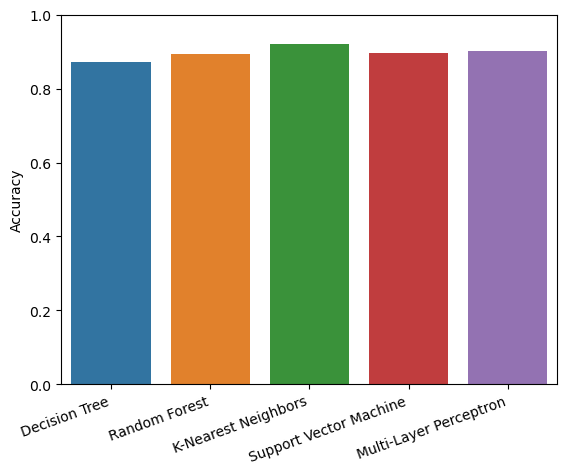

In [55]:
plot = sns.barplot(
    x=list(models.keys()),
    y=[model.best_score_ for model in models.values()],
)
plot.set_ylim(0, 1.0)
plot.set_ylabel("Accuracy")
plot.set_xticklabels(plot.get_xticklabels(), rotation=20, horizontalalignment="right")
